In [1]:
#Importing libraries esp requests
import requests
import pandas as pd 
import matplotlib.pyplot as plt

#Listing all urls to call here
dayone = "https://api.covid19api.com/dayone/country/singapore"
todayglobalsummary = "https://api.covid19api.com/summary" 
sgdailycases = "https://api.covid19api.com/dayone/country/singapore/status/confirmed/live" 
sgrunningtotal = "https://api.covid19api.com/total/dayone/country/singapore/status/confirmed"


In [2]:
response = requests.request("GET", dayone)

singapore = pd.DataFrame(response.json())

#Returns Cumulative Total for Singapore for all confirmed/active/deaths/recovered cases each day beginning 01 Jan 2020 
singapore

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,f1471591-909d-4c12-9e8b-26ce43fa3b4e,Singapore,SG,,,,1.35,103.82,1,0,0,1,2020-01-23T00:00:00Z
1,ad7bf6e4-27b0-46e9-bdc5-998458be7e6c,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-24T00:00:00Z
2,25bb999d-2443-4505-925d-27f21af143f6,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-25T00:00:00Z
3,297dd8d4-5417-4922-9ac9-a93b9902d4c8,Singapore,SG,,,,1.35,103.82,4,0,0,4,2020-01-26T00:00:00Z
4,bee2a95e-2cf6-46e5-b2a5-9f4b4cca9613,Singapore,SG,,,,1.35,103.82,5,0,0,5,2020-01-27T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,aeeb6a9f-a249-4594-aa60-a7afbe735a9c,Singapore,SG,,,,1.35,103.82,267150,735,0,266415,2021-12-02T00:00:00Z
680,691eaac8-5a1c-46f0-b532-199607de0e93,Singapore,SG,,,,1.35,103.82,267916,744,0,267172,2021-12-03T00:00:00Z
681,a6c9290f-66cb-4395-972a-54d27c5acf05,Singapore,SG,,,,1.35,103.82,268659,746,0,267913,2021-12-04T00:00:00Z
682,3edd9b12-f2e3-413e-8625-a9661bf66388,Singapore,SG,,,,1.35,103.82,269211,759,0,268452,2021-12-05T00:00:00Z


In [3]:
for i in range(1, len(singapore)):
    singapore.loc[i, 'Daily_Confirmed'] = singapore.loc[i, 'Confirmed'] - singapore.loc[i-1, 'Confirmed']
    singapore.loc[i, 'Daily_Deaths'] = singapore.loc[i, 'Deaths'] - singapore.loc[i-1, 'Deaths']
    singapore.loc[i, 'Daily_Recovered'] = singapore.loc[i, 'Recovered'] - singapore.loc[i-1, 'Recovered']
    singapore.loc[i, 'Daily_Active'] = singapore.loc[i, 'Active'] - singapore.loc[i-1, 'Active']

singapore

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,Daily_Confirmed,Daily_Deaths,Daily_Recovered,Daily_Active
0,f1471591-909d-4c12-9e8b-26ce43fa3b4e,Singapore,SG,,,,1.35,103.82,1,0,0,1,2020-01-23T00:00:00Z,NaN,NaN,NaN,NaN
1,ad7bf6e4-27b0-46e9-bdc5-998458be7e6c,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-24T00:00:00Z,2.0,0.0,0.0,2.0
2,25bb999d-2443-4505-925d-27f21af143f6,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-25T00:00:00Z,0.0,0.0,0.0,0.0
3,297dd8d4-5417-4922-9ac9-a93b9902d4c8,Singapore,SG,,,,1.35,103.82,4,0,0,4,2020-01-26T00:00:00Z,1.0,0.0,0.0,1.0
4,bee2a95e-2cf6-46e5-b2a5-9f4b4cca9613,Singapore,SG,,,,1.35,103.82,5,0,0,5,2020-01-27T00:00:00Z,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,aeeb6a9f-a249-4594-aa60-a7afbe735a9c,Singapore,SG,,,,1.35,103.82,267150,735,0,266415,2021-12-02T00:00:00Z,1101.0,9.0,0.0,1092.0
680,691eaac8-5a1c-46f0-b532-199607de0e93,Singapore,SG,,,,1.35,103.82,267916,744,0,267172,2021-12-03T00:00:00Z,766.0,9.0,0.0,757.0
681,a6c9290f-66cb-4395-972a-54d27c5acf05,Singapore,SG,,,,1.35,103.82,268659,746,0,267913,2021-12-04T00:00:00Z,743.0,2.0,0.0,741.0
682,3edd9b12-f2e3-413e-8625-a9661bf66388,Singapore,SG,,,,1.35,103.82,269211,759,0,268452,2021-12-05T00:00:00Z,552.0,13.0,0.0,539.0


In [4]:
singapore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               684 non-null    object 
 1   Country          684 non-null    object 
 2   CountryCode      684 non-null    object 
 3   Province         684 non-null    object 
 4   City             684 non-null    object 
 5   CityCode         684 non-null    object 
 6   Lat              684 non-null    object 
 7   Lon              684 non-null    object 
 8   Confirmed        684 non-null    int64  
 9   Deaths           684 non-null    int64  
 10  Recovered        684 non-null    int64  
 11  Active           684 non-null    int64  
 12  Date             684 non-null    object 
 13  Daily_Confirmed  683 non-null    float64
 14  Daily_Deaths     683 non-null    float64
 15  Daily_Recovered  683 non-null    float64
 16  Daily_Active     683 non-null    float64
dtypes: float64(4), i

In [5]:
singapore.dtypes

ID                  object
Country             object
CountryCode         object
Province            object
City                object
CityCode            object
Lat                 object
Lon                 object
Confirmed            int64
Deaths               int64
Recovered            int64
Active               int64
Date                object
Daily_Confirmed    float64
Daily_Deaths       float64
Daily_Recovered    float64
Daily_Active       float64
dtype: object

In [6]:
singapore['Date'] = pd.to_datetime(singapore['Date'], infer_datetime_format=True)
singapore = singapore.set_index('Date') 
singapore = singapore.drop(['Province','City','CityCode','CountryCode','Lat','Lon'],axis = 1)
singapore

,ID,Country,Confirmed,Deaths,Recovered,Active,Daily_Confirmed,Daily_Deaths,Daily_Recovered,Daily_Active
Date,,,,,,,,,,
2020-01-23,f1471591-909d-4c12-9e8b-26ce43fa3b4e,Singapore,1,0,0,1,NaN,NaN,NaN,NaN
2020-01-24,ad7bf6e4-27b0-46e9-bdc5-998458be7e6c,Singapore,3,0,0,3,2.0,0.0,0.0,2.0
2020-01-25,25bb999d-2443-4505-925d-27f21af143f6,Singapore,3,0,0,3,0.0,0.0,0.0,0.0
2020-01-26,297dd8d4-5417-4922-9ac9-a93b9902d4c8,Singapore,4,0,0,4,1.0,0.0,0.0,1.0
2020-01-27,bee2a95e-2cf6-46e5-b2a5-9f4b4cca9613,Singapore,5,0,0,5,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-02,aeeb6a9f-a249-4594-aa60-a7afbe735a9c,Singapore,267150,735,0,266415,1101.0,9.0,0.0,1092.0
2021-12-03,691eaac8-5a1c-46f0-b532-199607de0e93,Singapore,267916,744,0,267172,766.0,9.0,0.0,757.0
2021-12-04,a6c9290f-66cb-4395-972a-54d27c5acf05,Singapore,268659,746,0,267913,743.0,2.0,0.0,741.0


In [ ]:
""" singapore.dropna(axis=0,inplace=True)
singapore = singapore.astype({"Daily_Confirmed": int, "Daily_Active": int,"Daily_Recovered":int,"Daily_Deaths":int})
singapore """

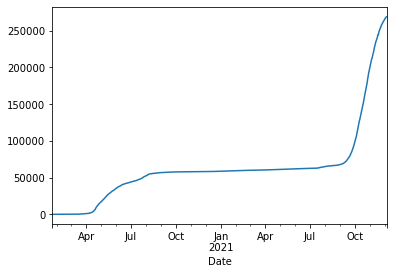

In [7]:
singapore['Confirmed'].plot()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014ED49EF908>,
      dtype=object)

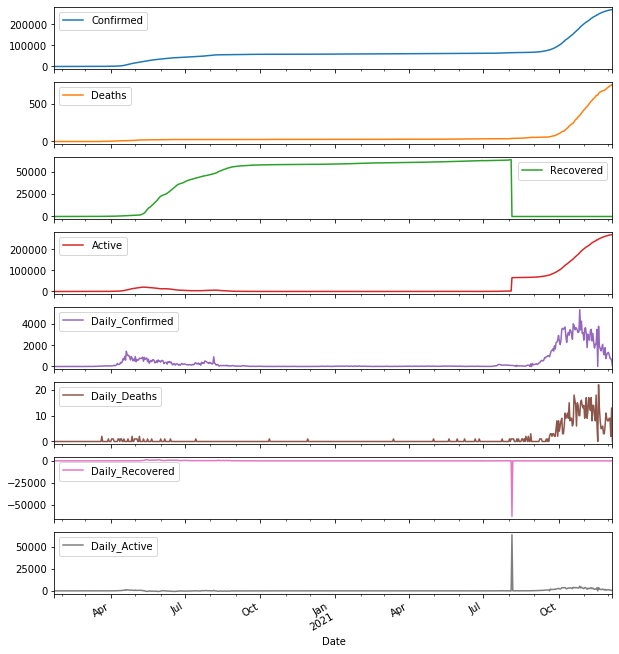

In [8]:
singapore.plot(subplots=True, figsize=(10,12))

It seems that at 2021-08-04 the API Counter resetted and total recovered cases suddenly dropped to 0 and total active cases suddenly increased from 2014 to 65468 cases on 2021-08-05 hmmm 


In [18]:
#singapore[singapore.Daily_Recovered> 1000]
#singapore.loc['2021-08-02']
singapore[singapore.Daily_Recovered< 0]
#singapore.loc['2021-08-04'] 


,ID,Country,Confirmed,Deaths,Recovered,Active,Daily_Confirmed,Daily_Deaths,Daily_Recovered,Daily_Active
Date,,,,,,,,,,
2021-06-30,815a14db-566e-4c1f-a0ee-94310472b688,Singapore,62579,36,62228,315,16.0,0.0,-335.0,7.0
2021-08-05,c0d0131e-4312-484f-8f83-42fba788ad84,Singapore,65508,40,0,65468,98.0,1.0,-63357.0,63454.0
